In [17]:
from mosaic_molecule import Compound
from numpy.linalg import eig
import numpy as np
import matplotlib.pyplot as plt

In [18]:
benzene = Compound("Benzene")

In [19]:
benzene.is_planar()

True

In [4]:
%matplotlib widget

In [5]:
atoms, pos = benzene.pos_matrix()

In [6]:
pos

array([[-4.23110e-01,  1.25383e+00, -6.53000e-03],
       [-1.81674e+00,  1.19531e+00,  4.46000e-03],
       [-2.46292e+00, -4.06600e-02,  9.40000e-03],
       [-1.71571e+00, -1.21852e+00,  1.41000e-03],
       [-3.22080e-01, -1.15999e+00, -9.05000e-03],
       [ 3.24110e-01,  7.59600e-02, -1.20000e-02],
       [ 8.03400e-02,  2.21680e+00, -1.06200e-02],
       [-2.39899e+00,  2.11294e+00,  9.30000e-03],
       [-3.54868e+00, -8.61800e-02,  1.91600e-02],
       [-2.21919e+00, -2.18148e+00,  3.57000e-03],
       [ 2.60140e-01, -2.07764e+00, -1.48100e-02],
       [ 1.40989e+00,  1.21470e-01, -1.88300e-02]])

In [7]:
X = pos.mean(axis = 0)[0]
Y = pos.mean(axis = 0)[1]
Z = pos.mean(axis = 0)[2]
X

-1.0694116666666666

In [8]:
X = np.tile(X, 3)
Y = np.tile(Y, 3)
Z = np.tile(Z, 3)

In [9]:
X

array([-1.06941167, -1.06941167, -1.06941167])

In [10]:
cov = np.cov(pos, rowvar=False)

In [11]:
cov

array([[ 2.20993575e+00,  3.35101515e-05, -1.70552860e-02],
       [ 3.35101515e-05,  2.21011359e+00,  1.83765997e-03],
       [-1.70552860e-02,  1.83765997e-03,  1.34693518e-04]])

In [12]:
eigvals, eigvects = eig(cov)

In [13]:
eigvects[:,0]

array([ 7.71733386e-03, -8.31570155e-04,  9.99969875e-01])

In [14]:
eigvects

array([[ 7.71733386e-03,  9.42630152e-01, -3.33749665e-01],
       [-8.31570155e-04, -3.33753439e-01, -9.42660040e-01],
       [ 9.99969875e-01, -7.55235851e-03,  1.79182361e-03]])

In [15]:
U, V, W = eigvects[0,:], eigvects[1,:], eigvects[2,:]

(-3.0, 3.0)

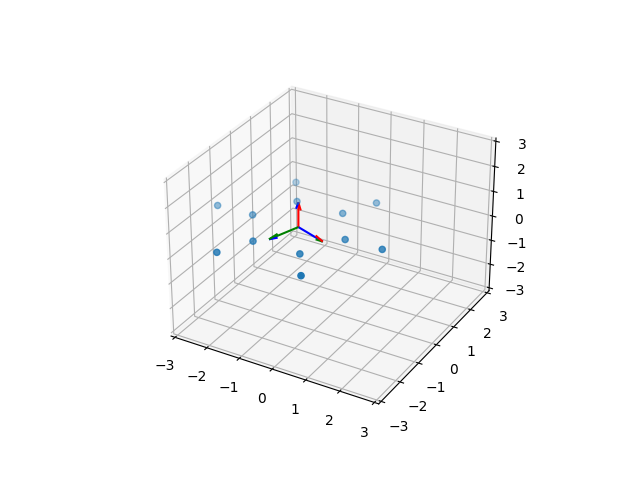

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(pos[:,0], pos[:,1], pos[:,2])
ax.quiver(X,Y,Z,U,V,W, normalize = True, color=['red', 'blue', 'green'])
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])

In [74]:
vector_1 = eigvects[:,0]

In [21]:
import sympy as sym
from sympy import Eq, Matrix, solve_linear_system

In [71]:
M = sym.MatrixSymbol('M', 3,3)

In [82]:
M*vector_1[0]

[[0.00771733386417555*M[0, 0] -0.000831570154894092*M[0, 1]
  0.9999698751708*M[0, 2]]
 [0.00771733386417555*M[1, 0] -0.000831570154894092*M[1, 1]
  0.9999698751708*M[1, 2]]
 [0.00771733386417555*M[2, 0] -0.000831570154894092*M[2, 1]
  0.9999698751708*M[2, 2]]]


TypeError: 'NoneType' object is not subscriptable

In [79]:
c_dict = {"C":"black", "H":"blue"}

In [80]:
c_dict[atoms]

TypeError: unhashable type: 'list'

In [22]:
formaldehyde = Compound("Formaldehyde")

In [23]:
formaldehyde.is_linear()

False

In [24]:
form_atoms, form_pos = formaldehyde.pos_matrix()

In [30]:
form_pos = form_pos - form_pos.mean(axis = 0)

In [26]:
form_atoms

['C', 'O', 'H', 'H']

(-3.0, 3.0)

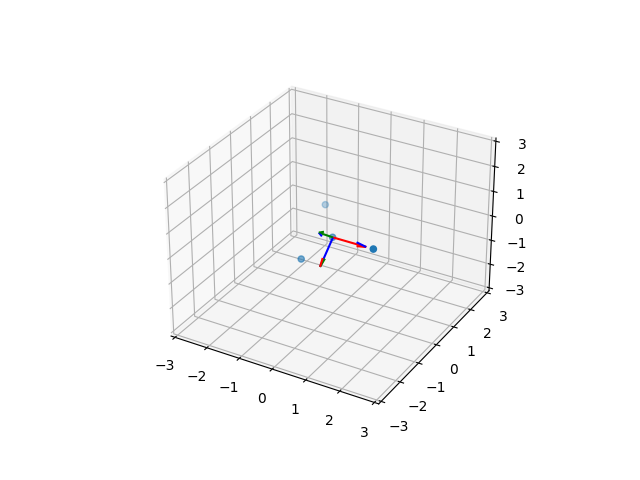

In [32]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(form_pos[0::,0], form_pos[0::,1], form_pos[0::,2])
ax.quiver(X,Y,Z,U,V,W, normalize = True, color=['red', 'blue', 'green'])
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])

In [31]:
cov = np.cov(form_pos, rowvar=False)
eigvals, eigvects = eig(cov)
U, V, W = eigvects[0,:], eigvects[1,:], eigvects[2,:]
X = np.tile(form_pos.mean(axis = 0)[0],3)
Y = np.tile(form_pos.mean(axis = 0)[0],3)
Z = np.tile(form_pos.mean(axis = 0)[0],3)

In [162]:
def cov_axis(molecule):
    atoms, pos = molecule.pos_matrix()
    pos = pos - pos.mean(axis = 0)
    X = np.tile(pos.mean(axis = 0)[0],3)
    Y = np.tile(pos.mean(axis = 0)[0],3)
    Z = np.tile(pos.mean(axis = 0)[0],3)
    cov = np.cov(pos, rowvar = False)
    eigvals, eigvects = eig(cov)
    U, V, W = eigvects[0,:], eigvects[1,:], eigvects[2,:]
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(pos[0::,0], pos[0::,1], pos[0::,2])
    ax.quiver(X,Y,Z,U,V,W, normalize = True, color=['red', 'blue', 'green'])
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    for atom, coord in zip(atoms,pos):
        ax.text(coord[0], coord[1], coord[2], f'{atom}')
    ax.set_box_aspect((1,1,1))


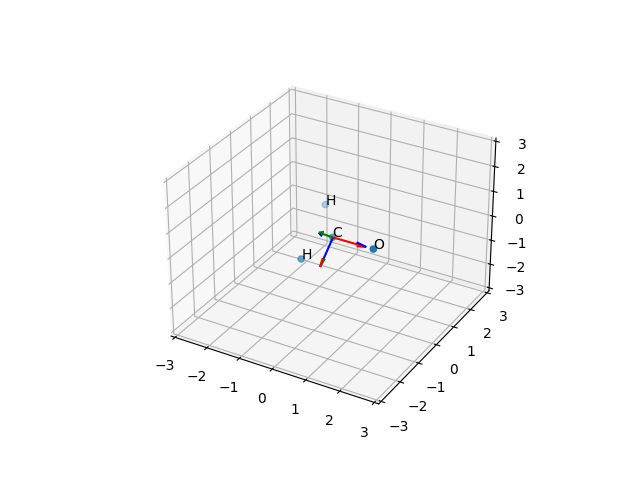

In [37]:
z_axis(formaldehyde)

In [39]:
water = Compound("Water")

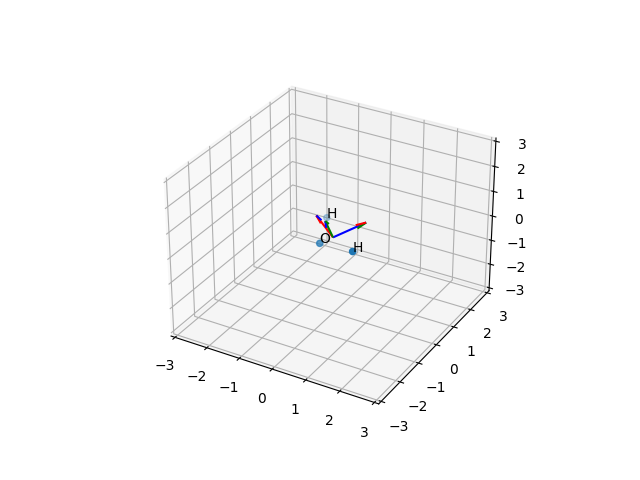

In [40]:
cov_axis(water)

In [148]:
def rot_gen(degeneracy, axis, mean):
    """
    Generates a rotation matrix about an arbitrary
    normalised vector using Rodrigues' Rotation Formula
    :param degneracy: int, specifies the degeneracy of rotation, n = 2 for 90 degree rotations
    :param axis: np array, a normalised vector of the axis of rotation
    :param mean: np array, a 1 by 3 array of mean position of molecules (origin)
    
    return: R, 3x3 np array that performs a rotation operation
    """
    axis = axis - mean
    x,y,z = axis
    theta = 360 / degeneracy
    theta = np.deg2rad(theta)
    R = np.array([[np.cos(theta) + x**2*(1-np.cos(theta)), x*y*(1-np.cos(theta)) - z*np.sin(theta), y*np.sin(theta) + x*z*(1-np.cos(theta))],
                 [z*np.sin(theta) + x*y*(1-np.cos(theta)), np.cos(theta) + y**2*(1-np.cos(theta)), -x*np.sin(theta) + y*z*(1-np.cos(theta))],
                 [-y*np.sin(theta) + x*z*(1-np.cos(theta)), x*np.sin(theta) + y*z*(1-np.cos(theta)), np.cos(theta) + z**2*(1-np.cos(theta))]
                 ])
    R[np.abs(R) < 1E-15] = 0
    return R
def rotate(R, pos_matrix):
    new_pos = []
    for row, i in zip(pos_matrix, np.arange(len(pos_matrix))):
        new_pos.append(np.matmul(R, pos_matrix[i, 0::]))
    return np.array(new_pos)

In [70]:
rot_gen(1, np.array([0,0,1]), np.array([0,0,0]))

array([[-1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])

In [73]:
help(rot_gen)

Help on function rot_gen in module __main__:

rot_gen(degeneracy, axis, mean)
    Generates a rotation matrix about an arbitrary
    normalised vector.
    :param degneracy: int, specifies the degeneracy of rotation, n = 2 for 90 degree rotations
    :param axis: np array, a normalised vector of the axis of rotation
    :param mean: np array, a 1 by 3 array of mean position of molecules (origin)
    
    return: R, 3x3 np array that performs a rotation operation



In [74]:
form_cov = np.cov(form_pos, rowvar=False)
form_ev, form_eigvecs = eig(form_cov)

In [79]:
form_eigvecs[:,0]

array([1., 0., 0.])

In [106]:
R = rot_gen(4, form_eigvecs[:,0], form_pos.mean(axis = 0))

In [107]:
form_pos[0::,0]

array([-0.012445,  1.212235, -0.599895, -0.599895])

In [108]:
form_pos

array([[-1.24450000e-02, -1.38777878e-17,  0.00000000e+00],
       [ 1.21223500e+00, -1.38777878e-17,  0.00000000e+00],
       [-5.99895000e-01, -6.32660000e-01, -6.84410000e-01],
       [-5.99895000e-01,  6.32660000e-01,  6.84410000e-01]])

In [109]:
np.matmul(R,form_pos[0,0::])

array([-1.24450000e-02,  0.00000000e+00, -1.38777878e-17])

In [110]:
len(form_pos)

4

In [111]:
new_form_pos = []
i = 0
while i < len(form_pos):
    new_form_pos.append(np.matmul(R, form_pos[i,0::]))
    i += 1
new_form_pos = np.array(new_form_pos)

In [112]:
new_form_pos

array([[-1.24450000e-02,  0.00000000e+00, -1.38777878e-17],
       [ 1.21223500e+00,  0.00000000e+00, -1.38777878e-17],
       [-5.99895000e-01,  6.84410000e-01, -6.32660000e-01],
       [-5.99895000e-01, -6.84410000e-01,  6.32660000e-01]])

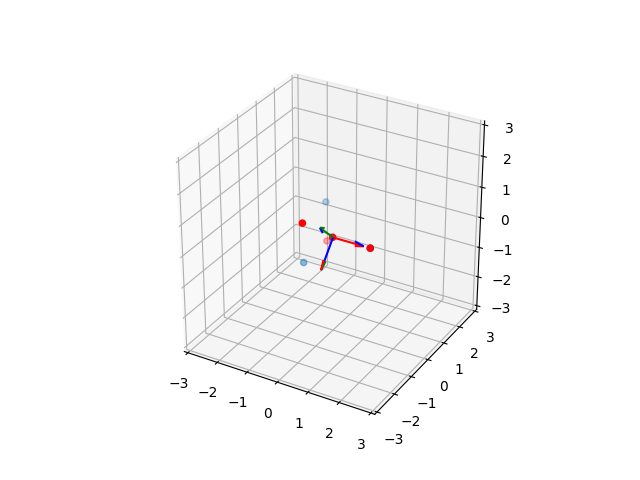

In [119]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(form_pos[0::,0], form_pos[0::,1], form_pos[0::,2])
ax.quiver(X,Y,Z,U,V,W, normalize = True, color=['red', 'blue', 'green'])
ax.scatter(new_form_pos[0::,0], new_form_pos[0::,1], new_form_pos[0::,2], color='red')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
ax.set_box_aspect((1,1,1))

In [115]:
np.inner(form_eigvecs[:,1],form_eigvecs[:,2])

2.7755575615628914e-16

C:\Users\yuhen\AppData\Local\Temp\ipykernel_11980\374696015.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


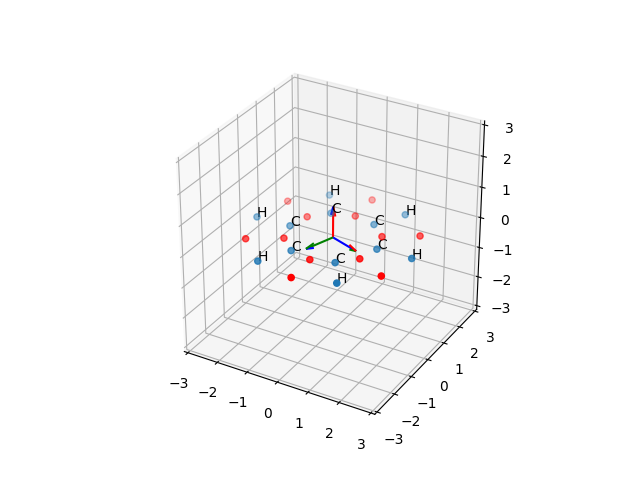

In [157]:

cov_axis(benzene)


In [123]:
pos = pos - pos.mean(axis = 0)

array([[ 0.64630167,  1.23617667, -0.004485  ],
       [-0.74732833,  1.17765667,  0.006505  ],
       [-1.39350833, -0.05831333,  0.011445  ],
       [-0.64629833, -1.23617333,  0.003455  ],
       [ 0.74733167, -1.17764333, -0.007005  ],
       [ 1.39352167,  0.05830667, -0.009955  ],
       [ 1.14975167,  2.19914667, -0.008575  ],
       [-1.32957833,  2.09528667,  0.011345  ],
       [-2.47926833, -0.10383333,  0.021205  ],
       [-1.14977833, -2.19913333,  0.005615  ],
       [ 1.32955167, -2.09529333, -0.012765  ],
       [ 2.47930167,  0.10381667, -0.016785  ]])

In [127]:
benzene_eigs, benzene_eigvect = eig(np.cov(pos,rowvar=False))

In [132]:
benzene_eigvect[:,0]

array([ 7.71733386e-03, -8.31570155e-04,  9.99969875e-01])

In [133]:
R_benzene = rot_gen(12, benzene_eigvect[:,0], pos.mean(axis = 0))

In [149]:
benzene_new = rotate(R_benzene, pos)

In [143]:
index = np.arange(len(pos))

In [145]:
for row, i in zip(pos, index):
    print(row,i)

[ 0.64630167  1.23617667 -0.004485  ] 0
[-0.74732833  1.17765667  0.006505  ] 1
[-1.39350833 -0.05831333  0.011445  ] 2
[-0.64629833 -1.23617333  0.003455  ] 3
[ 0.74733167 -1.17764333 -0.007005  ] 4
[ 1.39352167  0.05830667 -0.009955  ] 5
[ 1.14975167  2.19914667 -0.008575  ] 6
[-1.32957833  2.09528667  0.011345  ] 7
[-2.47926833 -0.10383333  0.021205  ] 8
[-1.14977833 -2.19913333  0.005615  ] 9
[ 1.32955167 -2.09529333 -0.012765  ] 10
[ 2.47930167  0.10381667 -0.016785  ] 11


In [151]:
pos[0::,0]

array([ 0.64630167, -0.74732833, -1.39350833, -0.64629833,  0.74733167,
        1.39352167,  1.14975167, -1.32957833, -2.47926833, -1.14977833,
        1.32955167,  2.47930167])

In [158]:
cyclohex = Compound("Cyclohexane")

In [159]:
cyclohex_atoms, cyclohex_pos = cyclohex.pos_matrix()

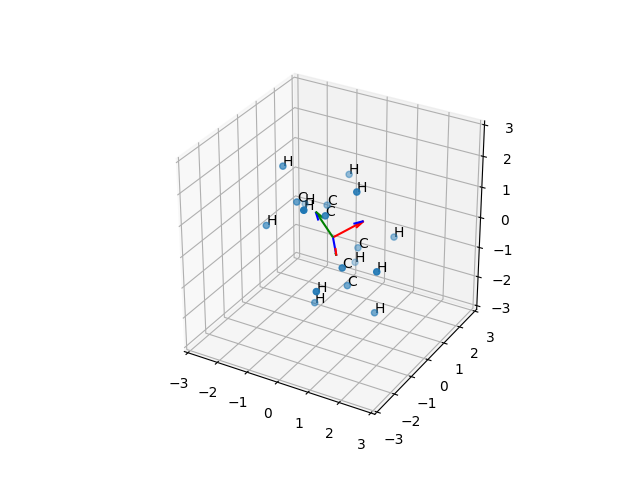

In [163]:
cov_axis(cyclohex)